## РК №2

##### Рубежный контроль №. Ищенко А.С. Вариант №6: задание 1, датасет 6

### Задание:
Для заданного набора данных постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы: "Метод опорных векторов" и "Градиентный бустинг". Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Набор данных состоит из данных, необходимых  для прогнозирования поступления в аспирантуру в Индии.
Набор содержит следующие данные:

Баллы GRE (из 340)

Баллы TOEFL (из 120)

Рейтинг университета (из 5)

Заявление о целях (из 5)

Рекомендательное письмо (из 5)

Средний балл бакалавриата (из 10)

Исследовательский опыт (0 или 1)

Шанс допуска (от 0 до 1)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn import utils

%matplotlib inline 
sns.set(style="ticks")

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.shape

(400, 9)

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Название последней колонки имеет незаметный лишний пробел в конце строки, уберем его

In [6]:
df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [9]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [10]:
print('Число пропусков')
df.isna().sum()

Число пропусков


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
print('Число уникальных значений для столбцов')
df.nunique()

Число уникальных значений для столбцов


Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

### Создание выборок

In [12]:
from sklearn import svm
from sklearn.model_selection import train_test_split

## Создание выборок
X_train, X_test, y_train, y_test = train_test_split(df, df['Chance of Admit'], test_size=0.3)

In [13]:
print('Размер обучающей выборки:', X_train.shape[0], 'x', X_train.shape[1])
X_train.head()

Размер обучающей выборки: 280 x 9


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
270,271,306,105,2,2.5,3.0,8.22,1,0.72
1,2,324,107,4,4.0,4.5,8.87,1,0.76
322,323,314,107,2,2.5,4.0,8.27,0,0.72
292,293,302,99,2,1.0,2.0,7.97,0,0.56
208,209,305,106,2,3.0,3.0,8.16,0,0.64


In [14]:
print('Размер тестовой выборки:', X_test.shape[0], 'x', X_test.shape[1])
X_test.head()

Размер тестовой выборки: 120 x 9


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
333,334,319,108,3,3.0,3.5,8.54,1,0.71
277,278,320,101,2,2.5,3.0,8.62,0,0.70
62,63,304,105,2,3.0,3.0,8.20,1,0.54
61,62,307,101,3,4.0,3.0,8.20,0,0.47
392,393,326,112,4,4.0,3.5,9.12,1,0.84


### Регрессия. Метод опорных векторов (SVM)

In [15]:
from sklearn import svm
SVMRegr = svm.SVR()
SVMRegr.fit(X_train, y_train)
SVMRegr.score(X_test, y_test)

0.6257111643212458

In [16]:
SVMRegr_predict = SVMRegr.predict(X_test)
print(SVMRegr_predict)

[0.73131604 0.73161895 0.61239195 0.6169231  0.74542133 0.72109581
 0.61324086 0.70533166 0.70583584 0.64523738 0.58211832 0.76578658
 0.79215549 0.77673188 0.76392334 0.59003918 0.90586958 0.77177572
 0.63570379 0.74555109 0.60609396 0.83528117 0.66953527 0.73389676
 0.68591005 0.58390817 0.69596492 0.84097907 0.74645229 0.64648314
 0.87085547 0.87012487 0.66801411 0.88308115 0.7237251  0.64381348
 0.71807804 0.56791042 0.70481697 0.66226739 0.74850811 0.69073889
 0.81390063 0.79446784 0.79108263 0.69004558 0.84348028 0.80493762
 0.59375599 0.75678378 0.87663445 0.65958232 0.79714628 0.70450721
 0.74543932 0.69735163 0.74373227 0.79758098 0.75446921 0.70811183
 0.69938343 0.58054901 0.68410684 0.82445407 0.62140215 0.75271459
 0.73817429 0.57935649 0.72842316 0.60656197 0.61562669 0.77012252
 0.66612521 0.58570602 0.62627086 0.78187525 0.78956476 0.70232939
 0.7975721  0.62077003 0.6635169  0.6831899  0.68870433 0.66721984
 0.67975129 0.77149707 0.69595312 0.67981425 0.68407739 0.7750

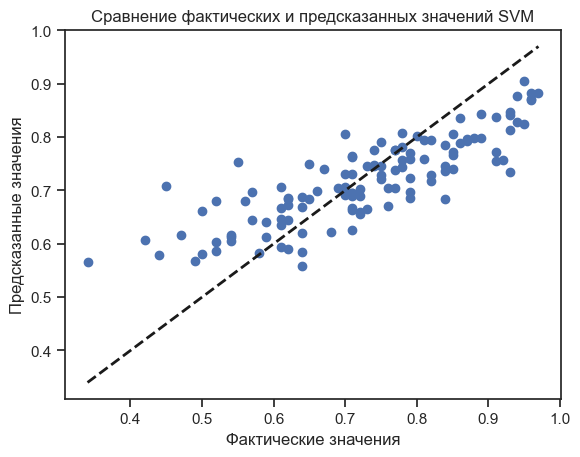

In [17]:
# Создание графика фактических значений и предсказанных значений
plt.scatter(y_test, SVMRegr_predict)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение фактических и предсказанных значений SVM")
plt.show()

### Регрессия. Градиентный бустинг.

In [18]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_regression(random_state=0)
GBR_reg = GradientBoostingRegressor(random_state=0)
GBR_reg.fit(X_train, y_train)
GBR_reg.score(X_test, y_test)

0.9998595543972816

In [19]:
GBR_reg_predict = GBR_reg.predict(X_test)
print(GBR_reg_predict)

[0.71000266 0.70000055 0.5406386  0.47002051 0.83984371 0.74997242
 0.59044879 0.7599907  0.60999651 0.56998469 0.5797842  0.85047657
 0.87028439 0.76997855 0.70999969 0.62001807 0.94996947 0.91000593
 0.60986648 0.74996945 0.54066706 0.85994451 0.63996088 0.9299302
 0.6200251  0.64000727 0.70999969 0.93000745 0.73999066 0.60998329
 0.95995778 0.95999827 0.70999966 0.96992785 0.78996689 0.62003196
 0.82009222 0.49006944 0.6900061  0.48990669 0.73999069 0.70000058
 0.93000745 0.82014323 0.75000643 0.71999614 0.88993204 0.85061652
 0.60999184 0.78000748 0.93997235 0.71993914 0.87014545 0.76998555
 0.73002478 0.56995276 0.77997929 0.88996264 0.90997844 0.4501504
 0.66000508 0.4897602  0.65000307 0.95000864 0.67996933 0.5406776
 0.76997889 0.43997391 0.82014655 0.42018755 0.54065486 0.79000421
 0.72999479 0.52019554 0.70999797 0.78007767 0.85968704 0.71999611
 0.87998143 0.64001547 0.709998   0.620037   0.70999931 0.60998498
 0.56010588 0.85062318 0.70999966 0.52021714 0.83974406 0.7400194

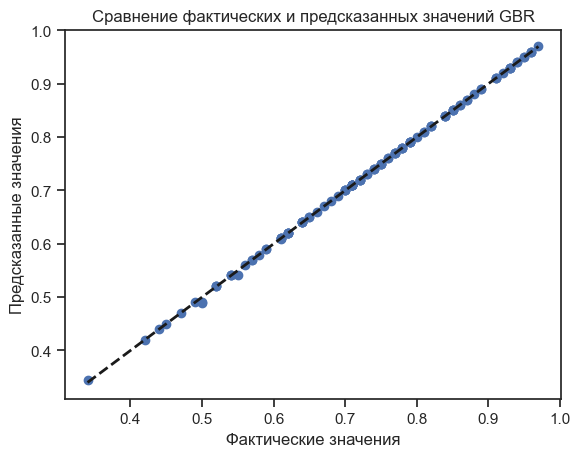

In [20]:
# Создание графика фактических значений и предсказанных значений
plt.scatter(y_test, GBR_reg_predict)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение фактических и предсказанных значений GBR")
plt.show()

### Оценка

In [21]:
from sklearn.metrics import mean_squared_error, max_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(df, df['Chance of Admit'], test_size=0.3)

SVM_test = SVMRegr.predict(X_test)
SVM_MSE = mean_squared_error(y_pred=SVM_test, y_true=y_test)

SVM_test = SVMRegr.predict(X_test)
SVM_r2 = r2_score(y_pred=SVM_test, y_true=y_test)

GBR_test = GBR_reg.predict(X_test)
GBR_MSE = mean_squared_error(y_pred=GBR_test, y_true=y_test)

GBR_test = GBR_reg.predict(X_test)
GBR_r2 = r2_score(y_pred=GBR_test, y_true=y_test)

print(f"MSE:\n SVM: {SVM_MSE}, GBR: {GBR_MSE}")
print(f"R2:\n SVM: {SVM_r2}, GBR: {GBR_r2}")

MSE:
 SVM: 0.006871741564670042, GBR: 7.467059132782527e-07
R2:
 SVM: 0.651145091518247, GBR: 0.9999620922846723


Я использую две метрики - среднеквадратичную ошибку (MSE) и коэффициент детерминации (R-squared).

MSE измеряет среднеквадратичную разницу между фактическими и предсказанными значениями. Она предоставляет информацию о точности модели, где меньшее значение MSE указывает на лучшую модель. MSE полезна, когда мы хотим получить численную оценку ошибки модели.

R-squared измеряет долю объясненной дисперсии в данных. Он предоставляет информацию о том, насколько хорошо модель объясняет вариацию целевой переменной. Значение находится в диапазоне от 0 до 1, чем ближе к 1, тем лучше модель.

Вывод:

Модель градиентного бустинга очевидно лучше, так как MSE у нее намного меньше, а R2 практически равна 1.